In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [ ]:
data

In [5]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [10]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [14]:
# Checking unique values for location, size, society, and total_sqft
print("Unique values in 'location':", data['location'].nunique())



Unique values in 'location': 1305


In [16]:
print("Unique values in 'size':", data['size'].nunique())
print("Unique values in 'society':", data['society'].nunique())
print("Unique values in 'total_sqft':", data['total_sqft'].nunique())

Unique values in 'size': 31
Unique values in 'society': 2688
Unique values in 'total_sqft': 2117


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

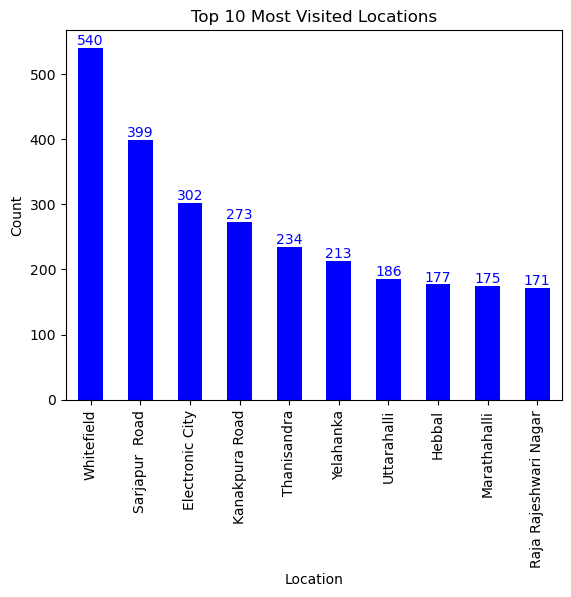

In [26]:

top_locations = data['location'].value_counts().nlargest(10)

# Creating a bar plot
top_locations.plot(kind='bar', color='blue')

# Adding annotations on top of each bar
for x, y in enumerate(top_locations):
    plt.text(x, y, str(y), ha='center', va='bottom', color='blue')


plt.title('Top 10 Most Visited Locations')
plt.xlabel('Location')
plt.ylabel('Count')


plt.show()


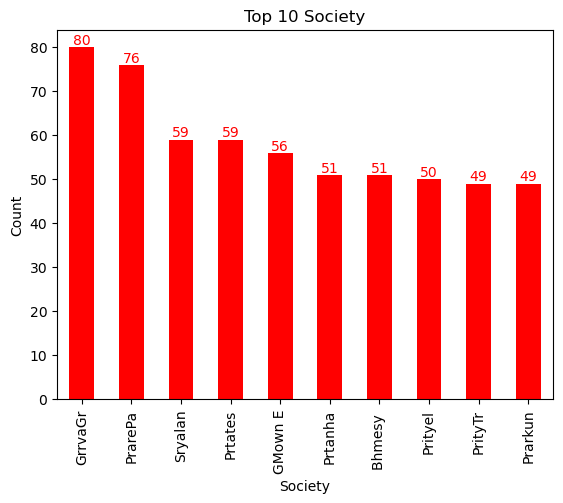

In [27]:
top_society = data['society'].value_counts().nlargest(10)

# Creating a bar plot
top_society.plot(kind='bar', color='red')

# Adding annotations on top of each bar
for x, y in enumerate(top_society):
    plt.text(x, y, str(y), ha='center', va='bottom', color='red')


plt.title('Top 10 Society')
plt.xlabel('Society')
plt.ylabel('Count')


plt.show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [29]:
# Filling missing values

In [37]:
data['size'].fillna(value=data['size'].mode(), inplace=True)

In [32]:
data['bath'].fillna(method='ffill', inplace=True)

In [35]:
data['balcony'].fillna(method='ffill', inplace=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13320 non-null  float64
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [40]:
# converting object to float
data['total_sqft'] = pd.to_numeric(data['total_sqft'], errors='coerce')

In [41]:
#dropping columns
data = data.drop(columns=['society', 'location', 'availability'])

In [42]:
data

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,5 Bedroom,3453.0,4.0,0.0,231.00
13316,Super built-up Area,4 BHK,3600.0,5.0,0.0,400.00
13317,Built-up Area,2 BHK,1141.0,2.0,1.0,60.00
13318,Super built-up Area,4 BHK,4689.0,4.0,1.0,488.00


In [43]:
data.isnull().sum()

area_type       0
size           16
total_sqft    247
bath            0
balcony         0
price           0
dtype: int64

In [44]:
data.dropna(inplace=True)

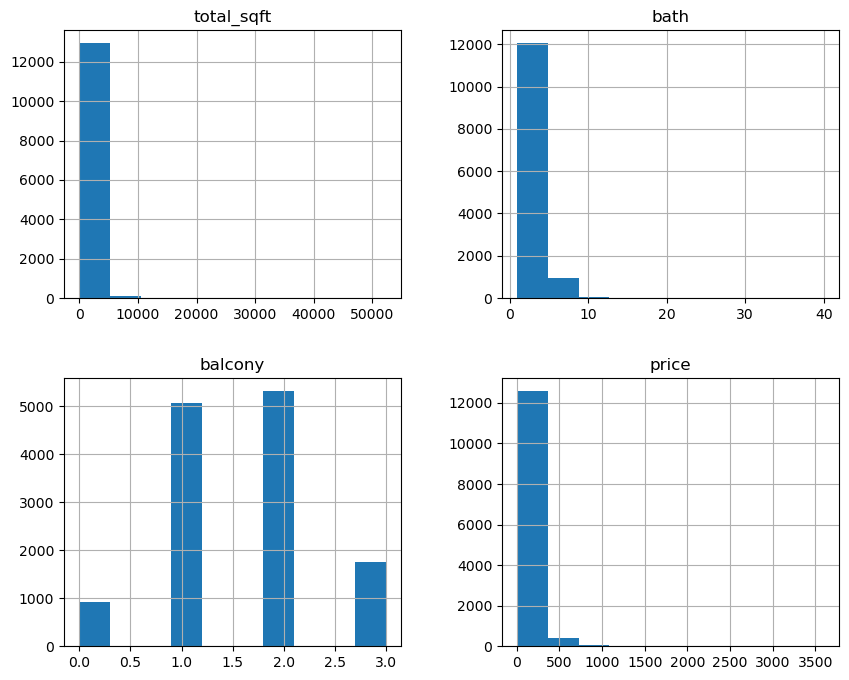

In [45]:
data.hist(figsize=(10,8))
plt.show()

In [46]:
data['sqft_price'] = data['total_sqft'] * data['price']

In [47]:
data

,area_type,size,total_sqft,bath,balcony,price,sqft_price
0,Super built-up Area,2 BHK,1056.0,2.0,1.0,39.07,41257.92
1,Plot Area,4 Bedroom,2600.0,5.0,3.0,120.00,312000.00
2,Built-up Area,3 BHK,1440.0,2.0,3.0,62.00,89280.00
3,Super built-up Area,3 BHK,1521.0,3.0,1.0,95.00,144495.00
4,Super built-up Area,2 BHK,1200.0,2.0,1.0,51.00,61200.00
...,...,...,...,...,...,...,...
13315,Built-up Area,5 Bedroom,3453.0,4.0,0.0,231.00,797643.00
13316,Super built-up Area,4 BHK,3600.0,5.0,0.0,400.00,1440000.00
13317,Built-up Area,2 BHK,1141.0,2.0,1.0,60.00,68460.00
13318,Super built-up Area,4 BHK,4689.0,4.0,1.0,488.00,2288232.00


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['total_sqft','bath','balcony','price']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
data = pd.get_dummies(data, columns = ['area_type','size'], drop_first= True)

In [48]:
X = data.drop(['price'], axis = 1)

In [49]:
X

,area_type,size,total_sqft,bath,balcony,sqft_price
0,Super built-up Area,2 BHK,1056.0,2.0,1.0,41257.92
1,Plot Area,4 Bedroom,2600.0,5.0,3.0,312000.00
2,Built-up Area,3 BHK,1440.0,2.0,3.0,89280.00
3,Super built-up Area,3 BHK,1521.0,3.0,1.0,144495.00
4,Super built-up Area,2 BHK,1200.0,2.0,1.0,61200.00
...,...,...,...,...,...,...
13315,Built-up Area,5 Bedroom,3453.0,4.0,0.0,797643.00
13316,Super built-up Area,4 BHK,3600.0,5.0,0.0,1440000.00
13317,Built-up Area,2 BHK,1141.0,2.0,1.0,68460.00
13318,Super built-up Area,4 BHK,4689.0,4.0,1.0,2288232.00


In [50]:
y = data['price']

In [51]:
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13065, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [63]:
X_train

,total_sqft,bath,balcony,sqft_price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,size_1 Bedroom,size_1 RK,size_10 BHK,...,size_5 BHK,size_5 Bedroom,size_6 BHK,size_6 Bedroom,size_7 BHK,size_7 Bedroom,size_8 BHK,size_8 Bedroom,size_9 BHK,size_9 Bedroom
11688,1760.0,2.0,1.0,149600.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12590,1162.0,2.0,2.0,114770.74,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5250,1700.0,3.0,1.0,161500.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8375,1225.0,2.0,2.0,58800.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1226,820.0,2.0,0.0,31980.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,1125.0,2.0,2.0,61875.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5289,1210.0,2.0,1.0,72600.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5493,600.0,1.0,0.0,12000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
881,1278.0,2.0,2.0,121410.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
svm_regressor = SVR(kernel ='linear')

svm_regressor.fit(X_train,y_train)

In [ ]:
y_pred = svm_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

In [ ]:
r2 = svm_regressor.score(X_test, y_test)
r2